# Data description

The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not.

# Importing required libraries

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Loading the data set

In [121]:
df=pd.read_csv('titanic_train.csv')

In [122]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [71]:
df.shape

(891, 12)

we have 891 rows and 12 columns

In [72]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

we have 177 null values in age column, 687 in cabin column and 2 in embarked column

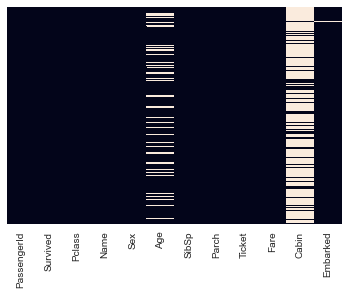

In [73]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)
plt.show()

In [74]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [75]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Cabin, Embarked,Name and Sex column has object datatypes. we have to treat them

# Checking the data imbalance

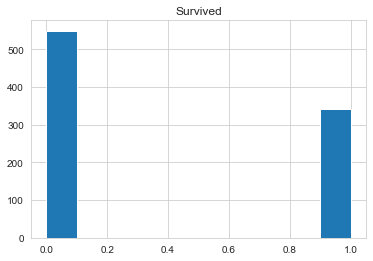

In [76]:
df.hist('Survived',grid=True)
plt.show()

Data seems to be balanced

0    549
1    342
Name: Survived, dtype: int64


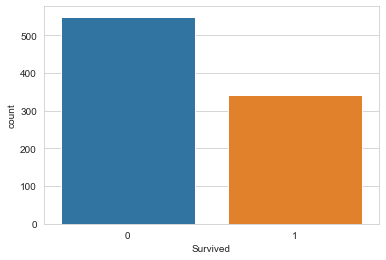

In [77]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=df)
print(df['Survived'].value_counts())
plt.show()

342 people has survived and 549 people has not survived

male      577
female    314
Name: Sex, dtype: int64


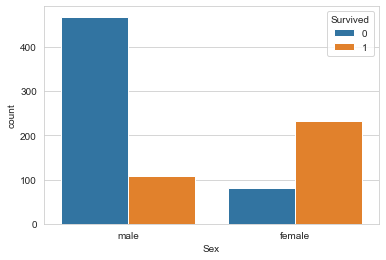

In [78]:
sns.set_style('whitegrid')
sns.countplot(x='Sex',data=df, hue = 'Survived')
print(df['Sex'].value_counts())
plt.show()

There were 314 female and 577 males. From this we can see that more females have survived as compared to males.

3    491
1    216
2    184
Name: Pclass, dtype: int64


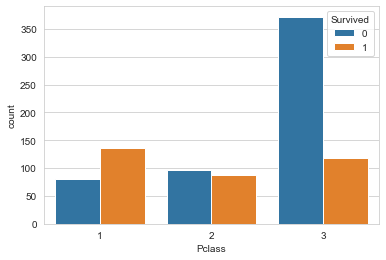

In [79]:
sns.set_style('whitegrid')
sns.countplot(x='Pclass',data=df, hue = 'Survived')
print(df['Pclass'].value_counts())
plt.show()

From this we can observe that, most of the people from Pclass 3 has not survived, as compared to class 1 and 2.

S    644
C    168
Q     77
Name: Embarked, dtype: int64


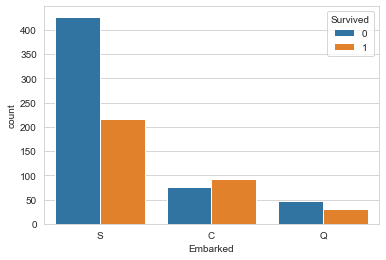

In [80]:
sns.set_style('whitegrid')
sns.countplot(df['Embarked'],data=df, hue='Survived')
print(df['Embarked'].value_counts())
plt.show()

Most of the people embarked from S port have not survived.

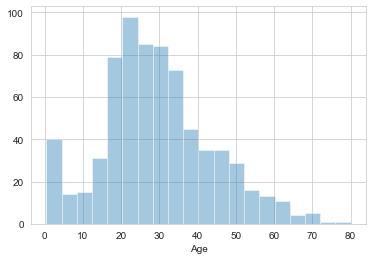

In [81]:
sns.distplot(df['Age'].dropna(),kde=False)
plt.show()

So maximum number of people were between 20-30 Age group

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


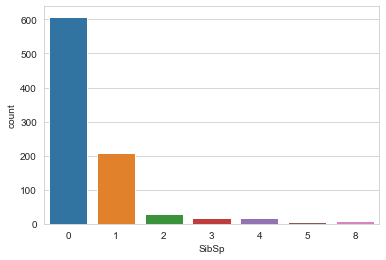

In [82]:
sns.set_style('whitegrid')
sns.countplot(df['SibSp'],data=df)
print(df['SibSp'].value_counts())
plt.show()

Maximum number of people have no Sibling or spouse

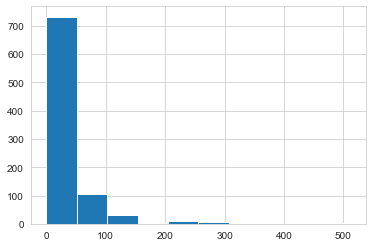

In [83]:
df['Fare'].hist(grid=True)
plt.show()

Maimum people had paid fare between 0 to 50

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


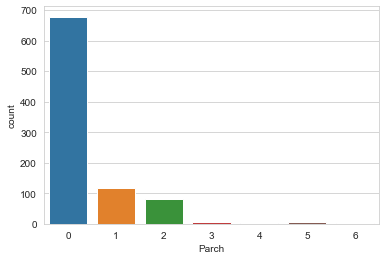

In [84]:
sns.set_style('whitegrid')
sns.countplot(df['Parch'],data=df)
print(df['Parch'].value_counts())

678 people does not have any Parents or Children

# Filling the null values

In [128]:
df['Age'] = df['Age'].replace(np.NaN,df['Age'].median())

In [126]:
df['Cabin'] = df['Cabin'].replace(np.NaN,df['Cabin'].mode().iloc[0])

In [125]:
df['Embarked'] =df['Embarked'].replace(np.NaN,df['Embarked'].mode().iloc[0])

In [129]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

# Encoding of DataFrame

In [107]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [127]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S


Here we can drop the column Name, Ticket and Cabin.
We can convert Sex and Embarked to numerical variable.

In [130]:
df['Sex'] = enc.fit_transform(df['Sex'].values.reshape(-1,1))

In [131]:
df['Embarked'] = enc.fit_transform(df['Embarked'].values.reshape(-1,1))

In [132]:
df.drop(['Name','Ticket','Cabin'],axis=1,inplace=True)

In [133]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1.0,22.0,1,0,7.2500,2.0
1,2,1,1,0.0,38.0,1,0,71.2833,0.0
2,3,1,3,0.0,26.0,0,0,7.9250,2.0
3,4,1,1,0.0,35.0,1,0,53.1000,2.0
4,5,0,3,1.0,35.0,0,0,8.0500,2.0


# Checking the Correlation

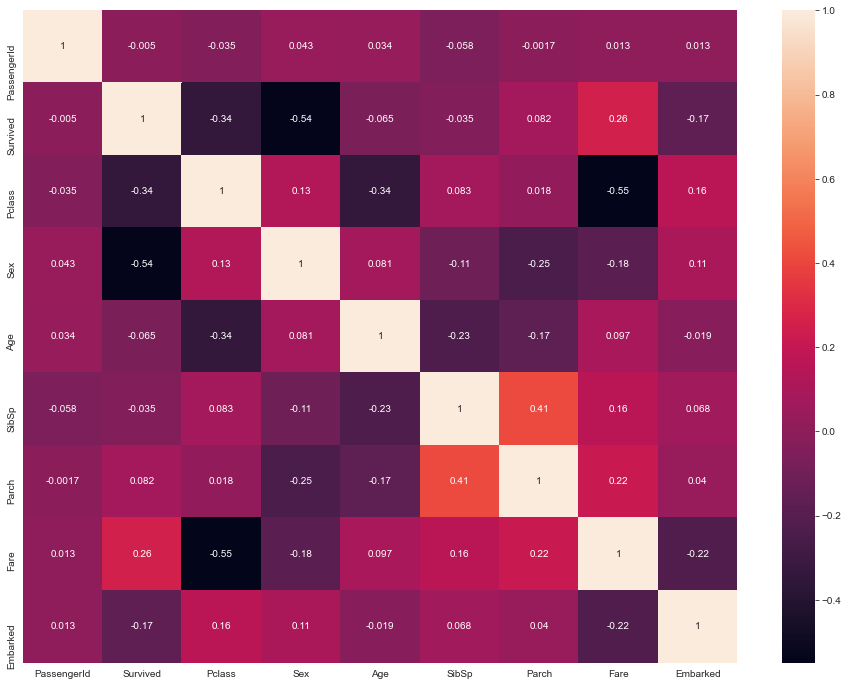

In [136]:
plt.figure(figsize=[16,12])
sns.heatmap(df.corr(),annot=True)
plt.show()

Observations:
- Survived is slightly correlated to Fare
- Pclass is negatively correlated to Fare
- Sex is negatively correlated to Survived
- Sibsp is positively correlated to Parch
- Fare is negatively correlated to Pclass 

# Checking the Outliers

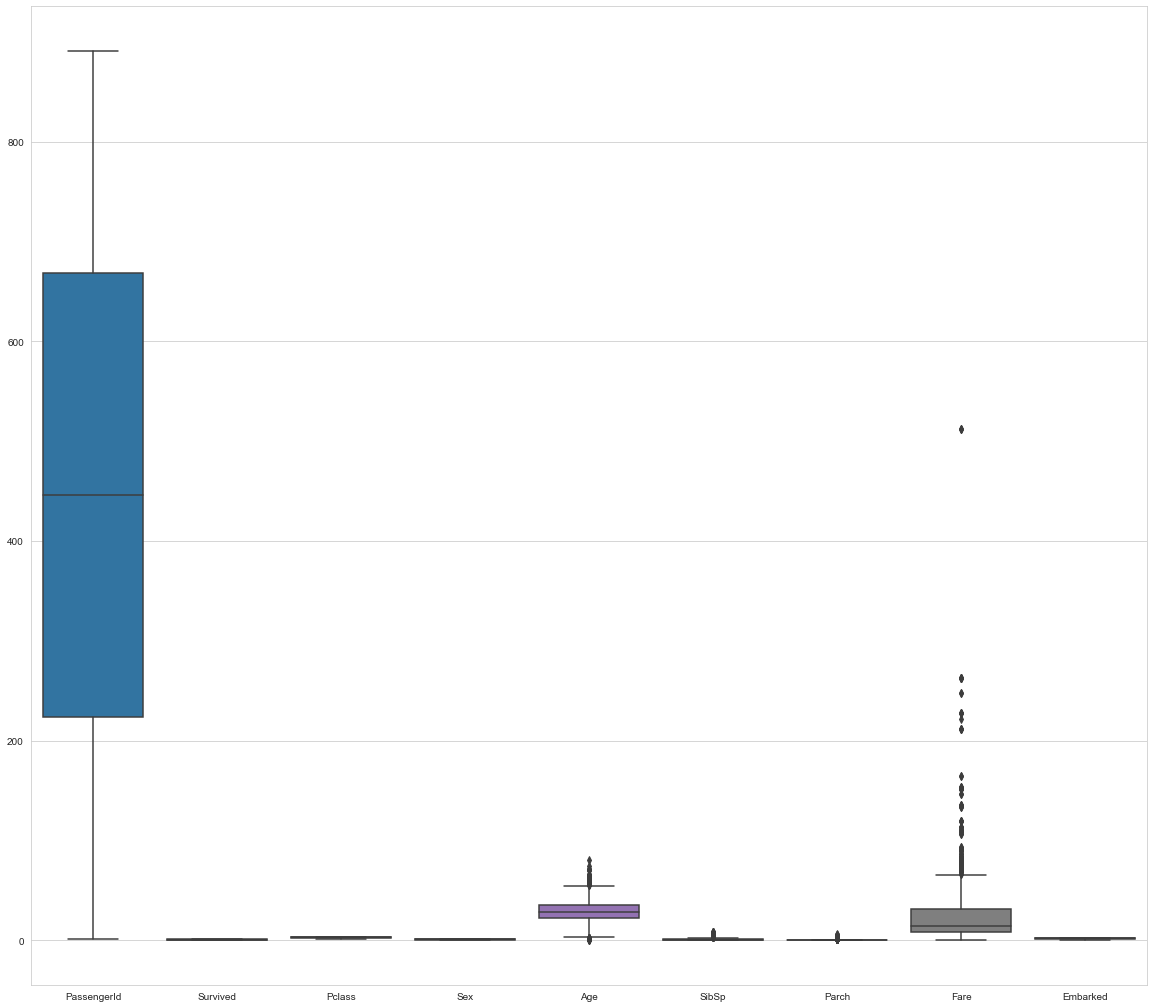

In [138]:
plt.figure(figsize=[20,18])
sns.boxplot(data=df)
plt.show()

We can see some outliers in Age, Sibsp,Parch,Fare column

# Removing the Outliers

In [141]:
from scipy.stats import zscore

In [142]:
z=np.abs(zscore(df))

In [145]:
df_new=df[(z<3).all(axis=1)]
df_new.shape

(820, 9)

In [146]:
df.shape

(891, 9)

Approx 7-8% data loss is acceptable hence we can remove the outliers

In [147]:
df=df_new

# Normal Distribution Curve

In [193]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked'],
      dtype='object')

<AxesSubplot:xlabel='PassengerId', ylabel='Density'>

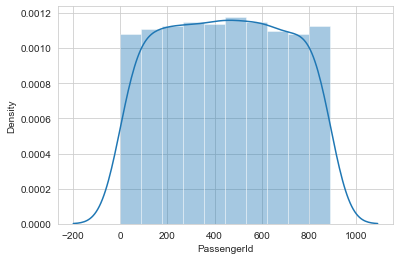

In [199]:
sns.distplot(df['PassengerId'])

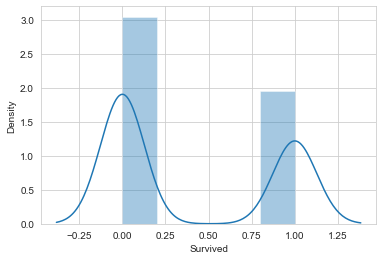

In [198]:
sns.distplot(df['Survived'])
plt.show()

<AxesSubplot:xlabel='Pclass', ylabel='Density'>

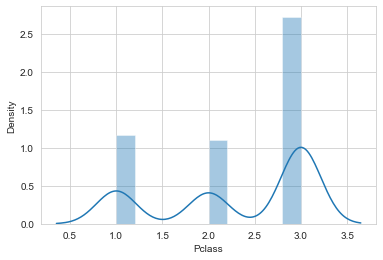

In [200]:
sns.distplot(df['Pclass'])

<AxesSubplot:xlabel='Sex', ylabel='Density'>

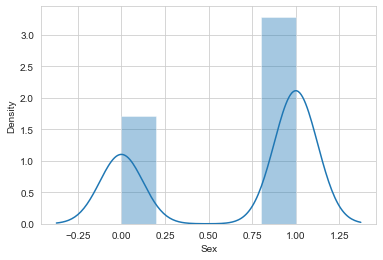

In [201]:
sns.distplot(df['Sex'])

<AxesSubplot:xlabel='Age', ylabel='Density'>

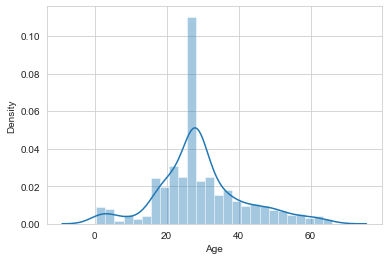

In [204]:
sns.distplot(df['Age'])

<AxesSubplot:xlabel='SibSp', ylabel='Density'>

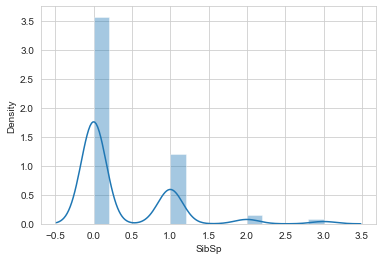

In [205]:
sns.distplot(df['SibSp'])

<AxesSubplot:xlabel='Parch', ylabel='Density'>

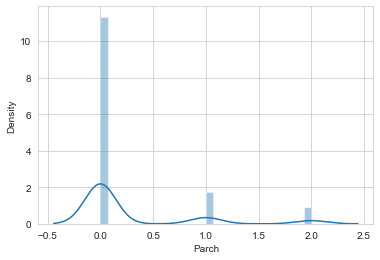

In [206]:
sns.distplot(df['Parch'])

<AxesSubplot:xlabel='Fare', ylabel='Density'>

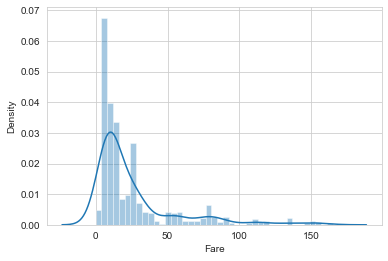

In [207]:
sns.distplot(df['Fare'])

<AxesSubplot:xlabel='Embarked', ylabel='Density'>

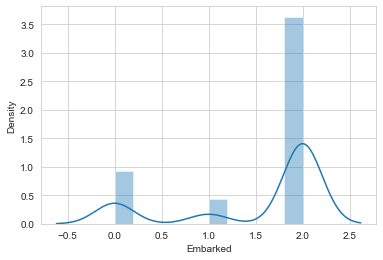

In [208]:
sns.distplot(df['Embarked'])

# Splitting the dataset

In [184]:
x=df.drop('Survived',axis=1)
y=df['Survived']

In [185]:
x.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,1.0,22.0,1,0,7.2500,2.0
1,2,1,0.0,38.0,1,0,71.2833,0.0
2,3,3,0.0,26.0,0,0,7.9250,2.0
3,4,1,0.0,35.0,1,0,53.1000,2.0
4,5,3,1.0,35.0,0,0,8.0500,2.0


In [186]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

# Checking the skewness

In [187]:
x.skew()

PassengerId    0.003454
Pclass        -0.632242
Sex           -0.664152
Age            0.401952
SibSp          1.979577
Parch          2.122629
Fare           2.318761
Embarked      -1.277386
dtype: float64

# Removing the skewness

In [188]:
from sklearn.preprocessing import power_transform

In [189]:
df_x=power_transform(x)
df_x=pd.DataFrame(df_x,columns=x.columns)

In [190]:
df_x.skew()

PassengerId   -0.279863
Pclass        -0.429718
Sex           -0.664152
Age            0.084462
SibSp          0.948944
Parch          1.581505
Fare          -0.018602
Embarked      -1.073724
dtype: float64

Sex, SibSp, Parch and Embarked are categorical variable, hence we will not remove skewness from these variables

In [191]:
x=df_x

In [192]:
x.skew()

PassengerId   -0.279863
Pclass        -0.429718
Sex           -0.664152
Age            0.084462
SibSp          0.948944
Parch          1.581505
Fare          -0.018602
Embarked      -1.073724
dtype: float64

In [209]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [210]:
df_y=sc.fit_transform(x)

In [211]:
df_y=pd.DataFrame(df_y,columns=x.columns)
df_y

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,-2.156313,0.872830,0.722036,-0.582291,1.551886,-0.484693,-0.834702,0.607787
1,-2.140321,-1.470676,-1.384973,0.715739,1.551886,-0.484693,1.553645,-1.787676
2,-2.125794,0.872830,-1.384973,-0.246907,-0.633505,-0.484693,-0.743314,0.607787
3,-2.112267,-1.470676,-1.384973,0.480254,1.551886,-0.484693,1.250341,0.607787
4,-2.099489,0.872830,0.722036,0.480254,-0.633505,-0.484693,-0.727191,0.607787
...,...,...,...,...,...,...,...,...
815,1.560970,-0.595500,0.722036,-0.164363,-0.633505,-0.484693,-0.227372,0.607787
816,1.564013,-1.470676,-1.384973,-0.840050,-0.633505,-0.484693,0.654320,0.607787
817,1.567055,0.872830,-1.384973,-0.082297,1.551886,2.086654,0.394908,0.607787
818,1.570096,-1.470676,0.722036,-0.246907,-0.633505,-0.484693,0.654320,-1.787676


In [212]:
x=df_y

In [218]:
x.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,-2.156313,0.872830,0.722036,-0.582291,1.551886,-0.484693,-0.834702,0.607787
1,-2.140321,-1.470676,-1.384973,0.715739,1.551886,-0.484693,1.553645,-1.787676
2,-2.125794,0.872830,-1.384973,-0.246907,-0.633505,-0.484693,-0.743314,0.607787
3,-2.112267,-1.470676,-1.384973,0.480254,1.551886,-0.484693,1.250341,0.607787
4,-2.099489,0.872830,0.722036,0.480254,-0.633505,-0.484693,-0.727191,0.607787


# Finding the best Random State

In [226]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score

In [215]:
dtc=DecisionTreeClassifier()
svc=SVC()
rfc=RandomForestClassifier()

In [227]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    accu=accuracy_score(y_test,pred)
    if accu>maxAccu:
        maxAccu=accu
        maxRS=i
print('Best accuracy is',maxAccu, ' for random state',maxRS)  

Best accuracy is 0.8495934959349594  for random state 46


So our best random state is 46

# Training the model

In [229]:
model=[lr,svc,rfc,dtc]

for m in model:
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    print('accuracy score of',m)
    print(accuracy_score(y_test,pred))
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    score=cross_val_score(m,x,y,cv=5)
    print(score)
    print('Crossvalidation score for',m,'is',score.mean())

accuracy score of LogisticRegression()
0.7926829268292683
[[125  21]
 [ 30  70]]
              precision    recall  f1-score   support

           0       0.81      0.86      0.83       146
           1       0.77      0.70      0.73       100

    accuracy                           0.79       246
   macro avg       0.79      0.78      0.78       246
weighted avg       0.79      0.79      0.79       246

[0.79878049 0.79268293 0.76219512 0.79268293 0.79878049]
Crossvalidation score for LogisticRegression() is 0.7890243902439025
accuracy score of SVC()
0.7886178861788617
[[129  17]
 [ 35  65]]
              precision    recall  f1-score   support

           0       0.79      0.88      0.83       146
           1       0.79      0.65      0.71       100

    accuracy                           0.79       246
   macro avg       0.79      0.77      0.77       246
weighted avg       0.79      0.79      0.78       246

[0.81707317 0.80487805 0.79878049 0.79268293 0.85365854]
Crossvalidation 

# Hyperparameter tuning

In [230]:
from sklearn.model_selection import GridSearchCV

In [240]:
lr = LogisticRegression()
param_grid = {
    'C': [.01,.1,1]
}

grid = GridSearchCV(lr, param_grid, cv = 7)
print(grid.fit(x_train, y_train))

GridSearchCV(cv=7, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1]})


In [241]:
print(grid.best_params_)

{'C': 0.1}


In [242]:
LR_mod = LogisticRegression(C=0.1)
LR_mod.fit(x_train,y_train)
pred=LR_mod.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.7926829268292683
[[125  21]
 [ 30  70]]
              precision    recall  f1-score   support

           0       0.81      0.86      0.83       146
           1       0.77      0.70      0.73       100

    accuracy                           0.79       246
   macro avg       0.79      0.78      0.78       246
weighted avg       0.79      0.79      0.79       246



Accuracy after hyperparameter tuning is 0.79

# Saving the model

In [243]:
import joblib

In [245]:
joblib.dump(LR_mod,'titanicmodel.pkl')

['titanicmodel.pkl']

# Loading the saved model

In [246]:
model=joblib.load('titanicmodel.pkl')

In [249]:
conclusion=pd.DataFrame([model.predict(x_test)[:],pred[:]],index=['Predicted','Original'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,236,237,238,239,240,241,242,243,244,245
Predicted,1,0,1,0,0,1,1,0,0,0,...,0,1,1,0,1,0,1,0,0,1
Original,1,0,1,0,0,1,1,0,0,0,...,0,1,1,0,1,0,1,0,0,1
